## Build a neural network regression model using this dataset 

| Column   | Description                                                                                                   |
|----------|---------------------------------------------------------------------------------------------------------------|
| age      | Age of primary beneficiary                                                                                   |
| sex      | Insurance contractor gender: female, male                                                                    |
| bmi      | Body mass index, providing an understanding of body weights relative to height (kg/m^2), ideally 18.5 to 24.9 |
| children | Number of children covered by health insurance / Number of dependents                                        |
| smoker   | Smoking                                                                                                       |
| region   | The beneficiary's residential area in the US: northeast, southeast, southwest, northwest                   |
| charges  | Individual medical costs billed by health insurance                                                          |


In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [6]:
insurance_data = pd.read_csv('insurance.csv', delimiter=',')
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Data Preping
- Make all data into numerical encodings
    - one hot encoding
- Partition the dataset
    - Training data 70%-80%
    - Testing data 10%-15%

In [8]:
insurance_one_hot = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'])
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [23]:
# Create X and y values were y is the prediction of the charges
X = insurance_one_hot.drop('charges', axis=1)
X = X.astype(np.float32)
y = insurance_one_hot['charges']

In [24]:
# Partiion the data into train, test,k and validation sets

# First split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [42]:
X_train.shape

In [43]:
tf.random.set_seed(42)
# Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[len(X_train.columns)]),
    tf.keras.layers.Dense(1),
])

# Compile the model
insurance_model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae,
    metrics=['mae']
)

# Train the model
insurance_model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=0
)

In [44]:
# Evaluate the model
insurance_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 6208.3613 - mae: 6208.3613


[6208.361328125, 6208.361328125]

In [45]:
# Try to Improve Model by adding more layers
# SGD optimizer cuased nan switch to Amdam optimizer
tf.random.set_seed(42)
# Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[len(X_train.columns)]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
insurance_model_2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.mae,
    metrics=['mae']
)

# Train the model
insurance_model_2.fit(
    X_train,
    y_train,    
    epochs=100,
    verbose=0
)

In [46]:
# Evaluate the model
insurance_model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 5443.3130 - mae: 5443.3130


[5443.31298828125, 5443.31298828125]

In [54]:
# Try to Improve Model by adding more training epochs
tf.random.set_seed(42)
# Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[len(X_train.columns)]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
insurance_model_3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.mae,
    metrics=['mae']
)

# Train the model
history = insurance_model_3.fit(
    X_train,
    y_train,    
    epochs=200,
    verbose=0
)

In [55]:
# Evaluate the model
insurance_model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 3529.8340 - mae: 3529.8340


[3529.833984375, 3529.833984375]

### Plot History (Training Curve)

Text(0.5, 0, 'epoch')

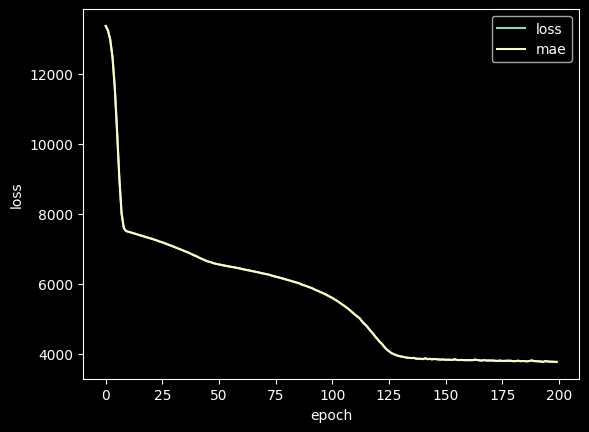

In [56]:
# Now you can plot the training history of all three models

pd.DataFrame(history.history).plot()

plt.ylabel('loss')
plt.xlabel('epoch')

<Axes: >

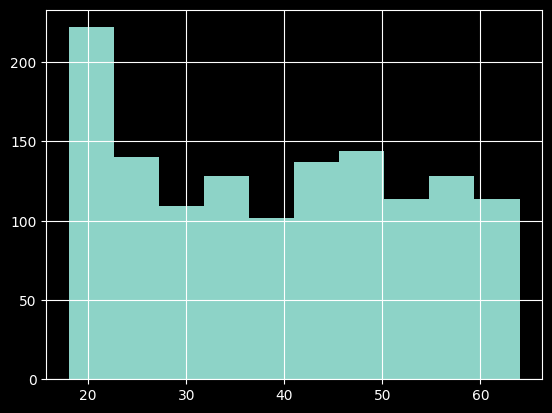

In [57]:
X["age"].hist()

<Axes: >

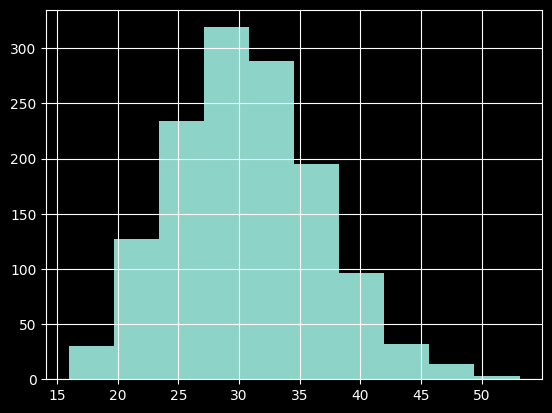

In [58]:
X["bmi"].hist()